# images denoising

In [1]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from sklearn.decomposition import dict_learning_online
from sklearn.decomposition import sparse_encode
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d
from skimage.transform import resize

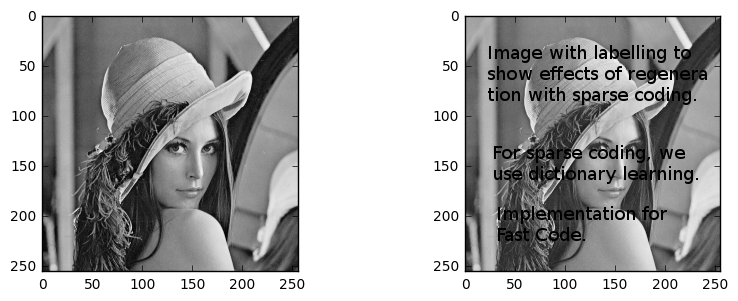

Extracting patches from the left half...
done in 0.02s.
(58564, 225)


In [4]:
from scipy import misc
face = misc.imread("img/Lenna256.png", flatten=True)
face_noisy = misc.imread("img/Lenna256Noisy.png", flatten=True)

#face = resize(face, (100,120))
height, width = face.shape
plt.figure(figsize=(10, 3.3))
plt.subplot(1, 2, 1)
plt.imshow(face, cmap=plt.cm.gray, interpolation='nearest')
plt.subplot(1, 2, 2)
plt.imshow(face_noisy, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

# 0~255 => 0~1
face = face / 255.0
# Extract all reference patches from the left half of the image
print('Extracting patches from the left half...')
t0 = time()
patch_size = (15, 15)
data = extract_patches_2d(face, patch_size)
data = data.reshape(data.shape[0], -1)
print('done in %.2fs.' % (time() - t0))
print data.shape
np.savetxt('patches_{}_{}'.format(data.shape[1], data.shape[0]), data, delimiter=' ', fmt='%.5f')

In [ ]:
K = 100
print('Learning the dictionary...')
t0 = time()
_, V = dict_learning_online(data, n_components=K, alpha=1, n_iter=500, dict_init=None, batch_size=1, shuffle=False, method='lars', inner_stats=None)
print('done in %.2fs.' % (time() - t0))

plt.figure(figsize=(15, 6))
for i, comp in enumerate(V[:K]):
    plt.subplot(5, 20, i + 1)
    plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

Learning the dictionary...


# with and without constant atom

In [ ]:
print('Extracting unseen patches on the right half... ')
t0 = time()
data = extract_patches_2d(face_noisy, patch_size)
data = data.reshape(data.shape[0], -1)
print('done in %.2fs.' % (time() - t0))
new_V = np.concatenate((V, np.ones((1,V.shape[1]))), axis=0)

plt.figure(figsize=(10, 3.3))
plt.subplot(1, 2, 1)
print('Encoding and decoding unseen patches of the right half with constant atom... ')
t0 = time()
code = sparse_encode(data, new_V, algorithm='lars', alpha=0.5)
print('done in %.2fs.' % (time() - t0))
patches = np.dot(code, new_V)
patches = patches.reshape(len(data), *patch_size)
reconstructionreconstruct_from_patches_2d(patches, (height, width))
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.title("with constant atom", size=16)

plt.subplot(1, 2, 2)
print('Encoding and decoding unseen patches of the right half without constant atom... ')
t0 = time()
code = sparse_encode(data, V, algorithm='lars', alpha=0.5)
print('done in %.2fs.' % (time() - t0))
patches = np.dot(code, V)
patches = patches.reshape(len(data), *patch_size)
reconstructionreconstruct_from_patches_2d(patches, (height, width))
plt.imshow(reconstruction2, cmap=plt.cm.gray, interpolation='nearest')
plt.title("without constant atom", size=16)

plt.show()

Extracting unseen patches on the right half... 
done in 0.02s.
Encoding and decoding unseen patches of the right half with constant atom... 


# Our DL

In [ ]:
Run test_dl first

In [90]:
import pandas as pd
my_D = pd.read_csv('dictionary_{}_{}'.format(data.shape[1], K), delim_whitespace=True, header=None).as_matrix()
print my_D.shape

(100, 49)


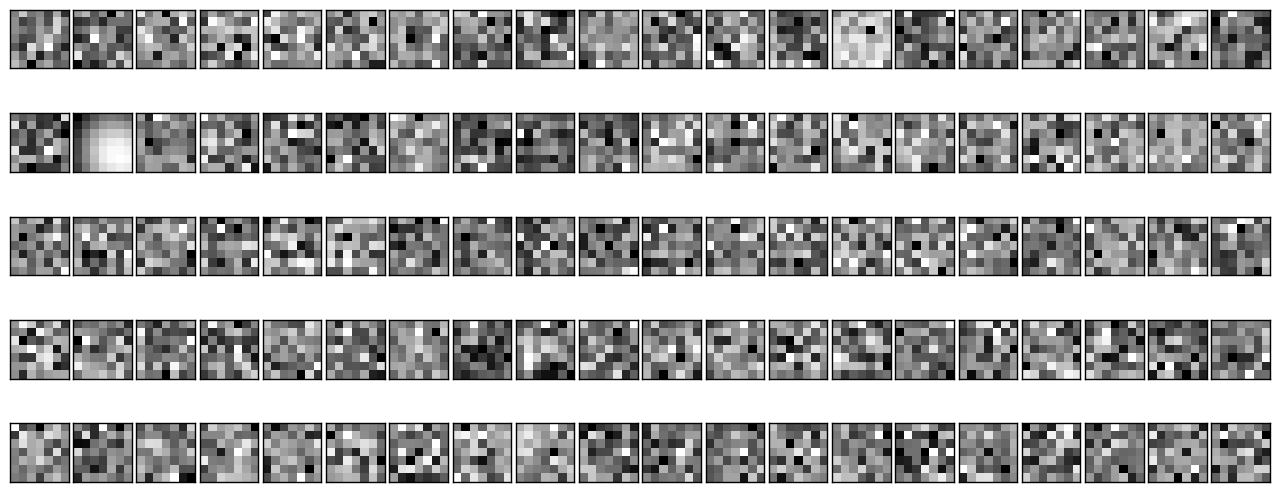

In [94]:
plt.figure(figsize=(15, 6))
for i, comp in enumerate(my_D[:K]):
    plt.subplot(5, 20, i + 1)
    plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

Extracting unseen patches on the right half... 
done in 0.00s.
Encoding and decoding unseen patches of the right half with constant atom... 
(101, 49)
done in 3.01s.
Encoding and decoding unseen patches of the right half without constant atom... 
done in 3.19s.
Encoding and decoding unseen patches of the right half with random dictionary... 
done in 3.10s.


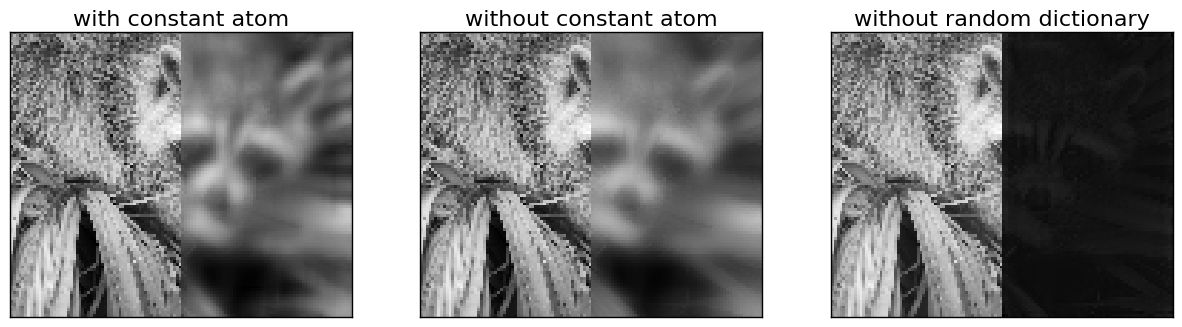

In [100]:
print('Extracting unseen patches on the right half... ')
t0 = time()
data = extract_patches_2d(face[:, width // 2:], patch_size)
data = data.reshape(data.shape[0], -1)
print('done in %.2fs.' % (time() - t0))
new_D = np.concatenate((my_D, np.ones((1,V.shape[1]))), axis=0)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
print('Encoding and decoding unseen patches of the right half with constant atom... ')
print(new_D.shape)
t0 = time()
code = sparse_encode(data, new_D, algorithm='lars', alpha=0.5)
print('done in %.2fs.' % (time() - t0))
patches = np.dot(code, new_D)
patches = patches.reshape(len(data), *patch_size)
reconstruction = face.copy()
reconstruction[:, width // 2:] = reconstruct_from_patches_2d(patches, (height, width // 2))
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.title("with constant atom", size=16)
plt.xticks(())
plt.yticks(())

plt.subplot(1, 3, 2)
print('Encoding and decoding unseen patches of the right half without constant atom... ')
t0 = time()
code = sparse_encode(data, my_D, algorithm='lars', alpha=0.5)
print('done in %.2fs.' % (time() - t0))
patches = np.dot(code, my_D)
patches = patches.reshape(len(data), *patch_size)
reconstruction2 = face.copy()
reconstruction2[:, width // 2:] = reconstruct_from_patches_2d(patches, (height, width // 2))
plt.imshow(reconstruction2, cmap=plt.cm.gray, interpolation='nearest')
plt.title("without constant atom", size=16)
plt.xticks(())
plt.yticks(())

plt.subplot(1, 3, 3)
print('Encoding and decoding unseen patches of the right half with random dictionary... ')
t0 = time()
random_dict = np.random.randn(my_D.shape[0], my_D.shape[1])
code = sparse_encode(data, random_dict, algorithm='lars', alpha=0.5)
print('done in %.2fs.' % (time() - t0))
patches = np.dot(code, random_dict)
patches = patches.reshape(len(data), *patch_size)
reconstruction2 = face.copy()
reconstruction2[:, width // 2:] = reconstruct_from_patches_2d(patches, (height, width // 2))
plt.imshow(reconstruction2, cmap=plt.cm.gray, interpolation='nearest')
plt.title("without random dictionary", size=16)
plt.xticks(())
plt.yticks(())

plt.show()